In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (5,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.7296 - loss: 0.7240 - val_accuracy: 0.8685 - val_loss: 0.3640
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.8782 - loss: 0.3400 - val_accuracy: 0.8783 - val_loss: 0.3252
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.8908 - loss: 0.2920 - val_accuracy: 0.8962 - val_loss: 0.2893
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9053 - loss: 0.2580 - val_accuracy: 0.8775 - val_loss: 0.3236
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9141 - loss: 0.2293 - val_accuracy: 0.8970 - val_loss: 0.2721


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.4),  # Dropout to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categ'orical_crossentropy',
              metrics=['accuracy'])

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [12]:
history = model.fit(x_train, y_train,
                    epochs=13,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stop])

Epoch 1/13
844/844 ━━━━━━━━━━━━━━━━━━━━ 170s 197ms/step - accuracy: 0.7719 - loss: 0.6638 - val_accuracy: 0.8630 - val_loss: 0.3794
Epoch 2/13
844/844 ━━━━━━━━━━━━━━━━━━━━ 168s 199ms/step - accuracy: 0.8759 - loss: 0.3407 - val_accuracy: 0.8890 - val_loss: 0.3016
Epoch 3/13
844/844 ━━━━━━━━━━━━━━━━━━━━ 166s 197ms/step - accuracy: 0.8977 - loss: 0.2796 - val_accuracy: 0.9012 - val_loss: 0.2863
Epoch 4/13
844/844 ━━━━━━━━━━━━━━━━━━━━ 201s 196ms/step - accuracy: 0.9090 - loss: 0.2519 - val_accuracy: 0.9057 - val_loss: 0.2585
Epoch 5/13
844/844 ━━━━━━━━━━━━━━━━━━━━ 204s 198ms/step - accuracy: 0.9164 - loss: 0.2294 - val_accuracy: 0.9090 - val_loss: 0.2536
Epoch 6/13
844/844 ━━━━━━━━━━━━━━━━━━━━ 201s 197ms/step - accuracy: 0.9218 - loss: 0.2143 - val_accuracy: 0.8953 - val_loss: 0.2819
Epoch 7/13
844/844 ━━━━━━━━━━━━━━━━━━━━ 167s 198ms/step - accuracy: 0.9279 - loss: 0.1975 - val_accuracy: 0.9160 - val_loss: 0.2357
Epoch 8/13
844/844 ━━━━━━━━━━━━━━━━━━━━ 199s 195ms/step - accuracy: 0.9318 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


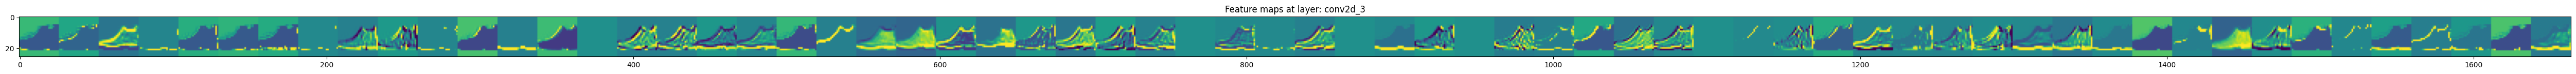

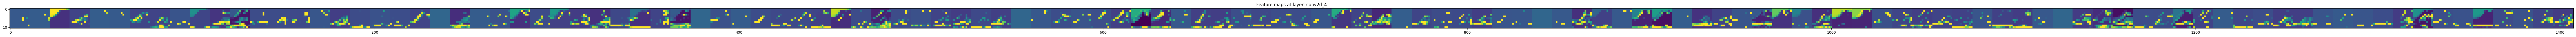

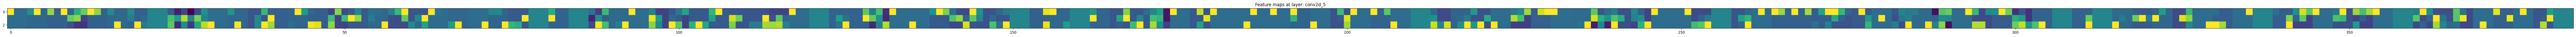

In [17]:
# Pick a sample image
sample_img = x_test[0]
img_batch = np.expand_dims(sample_img, axis=0)  # shape: (1, 28, 28, 1)

# Create a new model that outputs the activations of all conv layers using the Functional API approach
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=model.inputs, outputs=layer_outputs)


# Get feature maps
activations = activation_model.predict(img_batch)

# Plot feature maps
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
        activation_img = layer_activation[0, :, :, i]
        activation_img -= activation_img.mean()
        activation_img /= (activation_img.std() + 1e-5)
        activation_img *= 64
        activation_img += 128
        activation_img = np.clip(activation_img, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = activation_img

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(f'Feature maps at layer: {layer_name}')
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


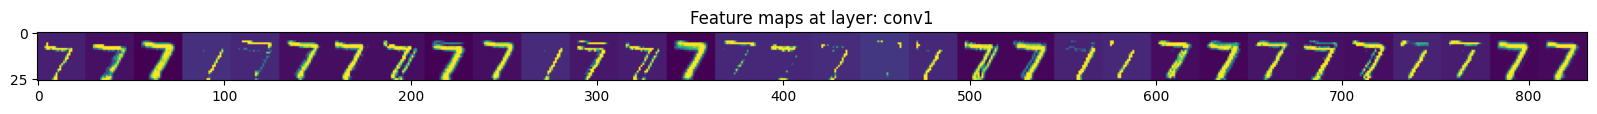

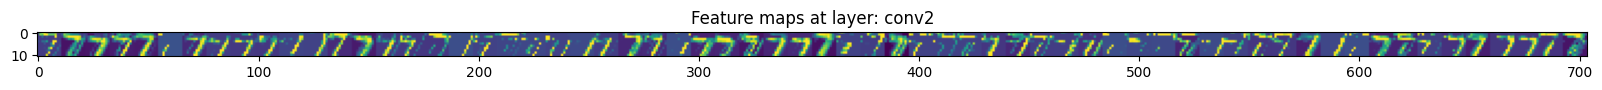

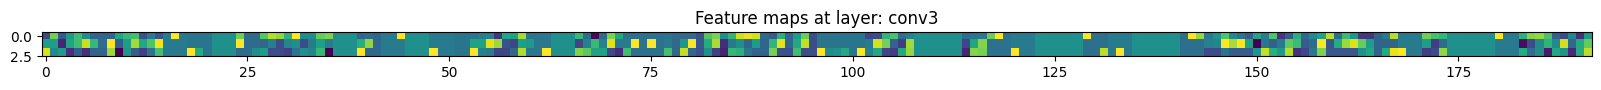

In [21]:
_ = model(np.zeros((1, 28, 28, 1)))
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
sample_img = x_test[0]
img_batch = np.expand_dims(sample_img, axis=0)  # (1, 28, 28, 1)
activations = activation_model.predict(img_batch)

# 8. Visualize feature maps
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # Number of filters
    size = layer_activation.shape[1]         # Feature map size

    # Display all feature maps in a grid
    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
        activation_img = layer_activation[0, :, :, i]
        activation_img -= activation_img.mean()
        activation_img /= (activation_img.std() + 1e-5)
        activation_img *= 64
        activation_img += 128
        activation_img = np.clip(activation_img, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = activation_img

    # Show the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(f'Feature maps at layer: {layer_name}')
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()